In [46]:
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy import linalg
from scipy.stats import norm
from scipy.stats import multivariate_normal
import itertools
%matplotlib inline

### Stein Variational Gradient Descent
#### by Qiang Liu, Dilin Wang (https://arxiv.org/abs/1608.04471)

Liu and Wang propose a general purpose algorithm for Bayesian inference.

In [57]:
### Functions for kernel term
def kernel(x1, x2, lengthScale=.1):
    return np.exp((-.5/lengthScale) * (x1-x2)**2)

def dK_dx(x1, x2, lengthScale=.1):
    return kernel(x1,x2,lengthScale) * -(x1-x2)/lengthScale


### Functions for prob. density
def pdf(x, mu, sigma):
    return (1./np.sqrt(2*np.pi*sigma**2)) * np.exp((-.5/sigma**2) * np.sum((x-mu)**2))

def mixPDF(x, mu1, mu2, sigma1, sigma2, pi1, pi2):
    return pi1 * pdf(x, mu1, sigma1) + pi2 * pdf(x, mu2, sigma2)

def dlogMixPDF_dx(x, mu1, mu2, sigma1, sigma2, pi1, pi2):
    return (1./mixPDF(x,mu1, mu2, sigma1, sigma2, pi1, pi2)) * ( pi1*pdf(x, mu1, sigma1)*-(x-mu1)/sigma1**2 + pi2*pdf(x, mu2, sigma2)*-(x-mu2)/sigma2**2 )

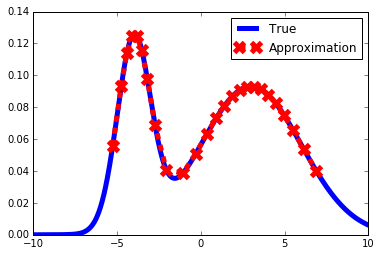

In [71]:
mu1 = -4.
mu2 = 3.
sigma1 = 1.
sigma2 = 3.
pi1 = .3
pi2 = .7

### generate samples
n = 25
x = []
for sampleIdx in xrange(n):
    x.append(np.random.normal() - 10)
    
### perform stein var. grad. descent
def steinOp(x, idx, mu1, mu2, sigma1, sigma2, pi1, pi2):
    returnVal = 0.
    for sampleIdx in xrange(len(x)):
        returnVal += kernel(x[sampleIdx], x[idx])*dlogMixPDF_dx(x[idx], mu1, mu2, sigma1, sigma2, pi1, pi2) + dK_dx(x[sampleIdx], x[idx])
    return (1./len(x)) * returnVal
    
maxEpochs = 500
lr = 2.5
for epochIdx in xrange(maxEpochs):
    for idx in xrange(n):
        x[idx] += lr * steinOp(x, idx, mu1, mu2, sigma1, sigma2, pi1, pi2)
        
x.sort()
probs = [mixPDF(z, mu1, mu2, sigma1, sigma2, pi1, pi2) for z in x]    
x_true = np.linspace(-10, 10, 1000)
probs_true = [mixPDF(z, mu1, mu2, sigma1, sigma2, pi1, pi2) for z in x_true]

plt.plot(x_true, probs_true, 'b-', linewidth=5, label="True")
plt.plot(x, probs, 'rx--', markersize=10, mew=5, linewidth=5, label="Approximation")
plt.legend()